# Introduction
The paper we have selected is focused on Cross Architectural Self-Supervision for Healthcare Applications.

The relevant code can be found in this repository: https://github.com/dl4h/project-team-58

The Colab notebook and relevant datasets and checkpoints can be found here: https://drive.google.com/drive/folders/1bD-T5_J6JfuNw8e0VWO74tLt1LPa9aw8?usp=sharing

## Background
* **Type of Problem** The major type of problem being solved by CASS is related to representation learning and data processing:
  - Existing self-supervised learning models often require expensive computational resources not widely available.
  - Medical imaging and Artificial Intelligence is often limited by a scarcity in prelabeled training data.

  To mitigate these issues, the authors propose *CASS* which allows for training CNN's and Transformers which can reduce pretraining time using less data and less computing resources.

  **Importance**: Representation learning allows us to use self-supervision to learn useful priors by pretraining unlabeled images. This is crucially important because the medical imaging field suffers from a lack of available labeled data due to a variety of factors, such as the high cost of labeling data at scale because it generally requires domain-specific knowledge. In fields with limited data or high cost to produce labels, we can use self-supervision to help with the downstream learning process without the need for labels. Solving these issues is important because it might allow for the expansion of machine learning and artificial intelligence research into more scenarios which might have previously been hindered by a lack of data or computing resources.

  **Difficulty**: Existing state-of-the-art self-supervised learning methods have extreme computational requirements that make them inaccessible to most practitioners. Additionally, the limited amount of data makes it infeasible to run smaller epochs with larger batch size to achieve the effectiveness outlined in these self-supervised learning methods.
  Overcoming the problem is difficult in that it is often a matter of logistics and practicality. For example, gaining labeled data might be impossible for a relatively new disease like COVID-19, as the authors describe in their paper.
  
  **State of the art methods and effectiveness**: As detailed above, existing state of the art methods for representation learning face challenges due to significant computational requirements and limited data availability. Traditionally, contrastive self-supervision methods use different augmentations of images to create positive pairs. Because of this, augmentations are applied twice which increases time complexity overall. Additionally, parameter sharing between the two architectures increases the time complexity when re-initializing architectures with lagging parameters. Additionally, smaller epochs and batch sizes tend to hurt performance.The current "state of the art" in terms of broad use is *Transfer Learning*, where a model developed for one task is reused as the starting point for a model on a second task. This is practical for scenarios in which there is a lack of data. The authors note that this is common in medical research due to issues such as patient privact or disease prevalence. However, CASS represents a different approach known as *Self-Supervised Learning*.

# Paper Explanation

## The Proposal
In the paper, the authors acknowledge that self-supervisied learning is generally superior to Transfer Learning, but they require multiple advanced graphical processing units (GPU's) running over the course of several days, something many researchers might consider a luxury both in terms of time and money.
Additionally, many self-supervised models suffer in terms of performance when run with small batch sizes.

To this end, the authors propose combining a convolutional neural network (CNN) with a transformer in a "response-based siamese contrastive method".

## The Innovations

CASS helps solve our general problem while mitigating these challenges by leveraging CNN and Transformer methods for efficient learning in a siamese contrastive method. CASS leverages architecture invariance instead of using the augmentation invariance approach of existing methods. Extracted representations of each input image are compared across two branches representing each respective architecture. By contrasting their extracted features, they can learn from each other on patterns they would generally miss. This helps provide more useful pre-trained data for the downstream learning method.

## Metrics (How Well it Worked)
CASS's approach helps reduce the time complexity of pre-training in two major ways. First, augmentations are only applied once in CASS in comparison to twice in augmentation invariance approaches. Therefore per application CASS uses less augmentations overall. Second, there is no scope for parameter sharing in CASS because the two architectures used are different. A large portion of time is saved in updating the two architectures each epoch as opposed to re-initializing architectures with lagging parameters. CASS has also been proven to handle smaller epochs and batch sizes with better performance overall.

## Contribution to Research Regime
The contribution is extremely important to the research regime. Without CASS certain representation learning problems would not be feasible to solve because of computational requirements and data availability. CASS overcomes those challenges while achieving even better performance.
CASS is recognized as a cutting-edged self-supervision learning method with accolades advertised on its' Github page such as:
- *State of the Art*: Partial Label Learning on Autoimmune Dataset
- *State of the Art*: Classification on Brain Tumor MRI Dataset
- *State of the Art*: State of the Art: Classification on ISIC 2019


In [ ]:
# code comment is used as inline annotations for your coding

# Scope of Reproducibility


1. **Hypothesis 1**: Leveraging the CASS self-supervised learning approach will significantly improve the efficiency of representation learning in healthcare applications in scenarios which involve a lack of data or computing resources


2. **Hypothesis 2 (Ablation study)**: Reducing the number of pre-training epochs and batch sizes for the CASS model will still allow for strong model performance in comparison with existing methods. **Note: As of final submission, this could not be accomplished.**


# Mount Notebook to Google Drive
Upload the data, pretrianed model, figures, etc to your Google Drive, then mount this notebook to Google Drive. After that, you can access the resources freely.

Instruction: https://colab.research.google.com/notebooks/io.ipynb

Example: https://colab.research.google.com/drive/1srw_HFWQ2SMgmWIawucXfusGzrj1_U0q

Video: https://www.youtube.com/watch?v=zc8g8lGcwQU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


# Methodology

The original CASS authors utilized the following datasets in their paper:
- DERMOFIT
- Brain MRI Classification
- SIIM-ISIC 2019 Dataset

The paper involved training a CNN and Transformer using CASS, then evaluating their performance vs. DINO (an alternative state-of-the-art self-supervision model).

However, in our approach we found that only the Brain MRI Classification dataset was available (with further confusing findings). The [official CASS Github repository](https://github.com/pranavsinghps1/CASS) contains the code required for training CASS on a given CNN and attention model specifically in the case of a fourth dataset: [MedMNIST](https://medmnist.com/). Specifically, PathMNIST which is a multi-class dataset for Colon pathology.

Based on these findings, we opted to attempt to recreate the CASS paper using the Brain Tumor dataset and MedMNIST.

We recognized that the MedMNIST dataset was not originally used in the dataset, but in our proposal we originally suggested that we may be able to leverage this dataset to test our hypothesis (*Leveraging CASS self-supervised learning will significantly improve efficiency of representation learning in scenarios which involve a lack of healthcare data or computing resources*).

### Environment

We utilized Google Colab to run our experiment notebook. The python version and associated libraries are detailed in the cells below.

In [1]:
import sys
print("Python version:", sys.version)

Python version: 3.11.2 (main, Mar 29 2023, 01:13:14) [Clang 14.0.0 (clang-1400.0.29.202)]


## Required Installs

In [2]:
# install necessary libraries (from requirements.txt) TODO Note errors in output
%pip install einops~=0.4.1
%pip install matplotlib~=3.5.2
%pip install matplotlib-inline~=0.1.2
%pip install numpy~=1.23.1
%pip install pandas~=1.4.3
%pip install Pillow~=9.2.0
%pip install scikit-learn~=1.1.1
%pip install scipy~=1.8.1
%pip install tensorboard~=2.9.1
%pip install timm~=0.5.4
%pip install torch~=1.11.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
%pip install torchtext~=0.12.0
%pip install torchaudio~=0.11.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
%pip install torchcontrib~=0.0.2
%pip install torchmetrics~=0.9.2
%pip install torchvision~=0.12.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
%pip install vit-pytorch~=0.35.8
%pip install pytorch-lightning~=1.6.5
%pip install tqdm~=4.64.0
%pip install h5py # for loading brain tumor HDF5 dataset
%pip install medmnist

# import packages you need
# from google.colab import drive

# imports for CASS
import math
import os
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import timm
import torch
import torch.nn as nn

from PIL import Image
from torch.utils.data import Dataset, DataLoader
from pytorch_lightning import Trainer, seed_everything
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from torch.utils.tensorboard import SummaryWriter
from torchcontrib.optim import SWA
from torchmetrics import Metric
from torchvision import transforms as tsfm
from tqdm import tqdm


DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.1 wi

/Users/robbieli/School/CS598 - Deep Learning for Healthcare/project-team-58/project-58-env/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Brain Tumor Dataset

### Data

The authors cite the brain tumor dataset from their official Github:
1. https://figshare.com/articles/dataset/brain_tumor_dataset/1512427
2. https://www.hindawi.com/journals/cin/2022/3236305/

Where #1 links to a dataset which hosts the images in zipped matlab format. Link #2 references another research paper, which itself references the Brain Tumor dataset located on [Kaggle](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri/).

The Kaggle version of the dataset includes a reference to the [Github version of the same dataset](https://github.com/SartajBhuvaji/Brain-Tumor-Classification-Using-Deep-Learning-Algorithms).

For our experiment, we opted to use the Github version of the dataset which provided the below starter code for loading the dataset as well as defining train and test data. It is important to note that the CASS authors also describe this data as having been split (train/test) in this same way by the data curators. As such, we did not change these definitions.

- The methods for cloning and loading a train/test dataset were re-used from that Github repository, however the attempted CASS implementation and exploratory data analysis (EDA) remains the work of this team.

In [ ]:
# The code below is from the brain tumor notebook associated with its' official Github/Kaggle repository, and is only for
# retrieving and setting up train/test data.
# The CASS authors mention that the brain tumor dataset they used (and this is the same one they referenced) are pre-split

import cv2
import random
import pickle
import tqdm
import os
import numpy as np

!git clone https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet

# Define necessary constants
IS_LOCAL = True
BASE_PATH = './' if IS_LOCAL else '/content'
TEST_DIR = f'{BASE_PATH}Brain-Tumor-Classification-DataSet/Testing'
TRAIN_DIR = f'{BASE_PATH}Brain-Tumor-Classification-DataSet/Training'
IMG_SIZE = 224
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]

# Creating training dataset
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(TRAIN_DIR,category)
        class_num = CATEGORIES.index(category)
        for img in tqdm.tqdm(os.listdir(path)):
          img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([new_array, class_num])

    random.shuffle(training_data)

create_training_data()
#np.save('train_data.npy', training_data)
print(f'training dataset size: {len(training_data)}')

X_train = np.array([i[0] for i in training_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_train = [i[1] for i in training_data]

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()


# Creating testing dataset
testing_data = []

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(TEST_DIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm.tqdm(os.listdir(path)):
          img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          testing_data.append([new_array, class_num])

    random.shuffle(testing_data)

create_testing_data()
#np.save('testing_data.npy', testing_data)
print(f'testing dataset size: {len(testing_data)}')
X_test= np.array([i[0] for i in testing_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_test = [i[1] for i in testing_data]

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

#### Exploratory Data Analysis (Brain Tumor Dataset)
Here, we analyze the data to understand it's format and most importantly, to understand if it is the same data the authors describe.

In [ ]:
import matplotlib.pyplot as plt

# Load the training or testing images and labels
pickle_in = open("X_train.pickle", "rb")
X_train = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("Y_train.pickle", "rb")
Y_train = pickle.load(pickle_in)
pickle_in.close()

# Choose a sample image and label, for example, the first one in the dataset
sample_image = X_train[0]
sample_label = Y_train[0]

# Since the images are stored in BGR format by OpenCV, convert them to RGB for displaying
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(sample_image)
plt.title(f'Tumor Type: {sample_label}')
plt.show()


In [ ]:
# understand distribution of labels

with open("Y_train.pickle", "rb") as f:
    Y_train = pickle.load(f)

with open("Y_test.pickle", "rb") as f:
    Y_test = pickle.load(f)

all_labels = Y_train + Y_test

tumor_types = {'glioma_tumor': 0, 'meningioma_tumor': 0, 'no_tumor': 0, 'pituitary_tumor': 0}

for label in all_labels:
    category = CATEGORIES[label]
    if category in tumor_types:
        tumor_types[category] += 1

# visualization
plt.bar(tumor_types.keys(), tumor_types.values())
plt.xlabel('Tumor Type')
plt.ylabel('Frequency')
plt.title('Distribution of Tumor Types')
plt.xticks(rotation=45)  # Rotate category names for better visibility
plt.show()


#### Statement Regarding Brain Tumor Dataset

The authors describe in their paper a brain tumor dataset which has 5,712 training images and 1,310 test images which results in approximately 18.66% train data in their experiment, with the remaining percentage allocated to test. This is something close to a 80/20 train test split.

However, the authors of this project found multiple instances of the brain tumor dataset (both referenced in the official CASS Github), and in both cases the number of total images (as well as train vs. test is different).

In our case, we have 3,264 total images, with 2,870 for training and 394 for testing. Applying the same understanding as above, this means we have a test set ratio of ~ 12.07% to training data of 87.93%.

**Because we are not operating with the same total data (or ratios), we cannot accurately replicate the study as intended using this dataset. We attempted to load this data into the CNN/Attention modle using the CASS-supplied code but ultimately were unsuccessful. These efforts will be explained in the Results section.**

## MedMNIST

###  Data


  The data source for our project is the PathMNIST dataset located within the larger MedMNIST database. The MedMNIST data is curated by researchers from several universities, such as: Shanghai Jiao Tong University, RWTH Aachen University, and Harvard University.

  PathMNIST in particular is a collection of images corresponding to Colon Pathology with regard to (9) different classes or "labels".

  The dataset is located here: https://zenodo.org/records/10519652 but for our purposes, we chose to utilize the Python package (https://pypi.org/project/medmnist/).

  * Statistics: include basic descriptive statistics of the dataset like size, cross validation split, label distribution, etc.
  * Data process: how do you munipulate the data, e.g., change the class labels, split the dataset to train/valid/test, refining the dataset.

In [4]:
import numpy as np
import torchvision.transforms as transforms
import torch.utils.data as data
import medmnist
from medmnist import INFO

data_flag = "pathmnist"
download = True

# BATCH_SIZE = 128 --> this causes Colab machines to run out of memory, even with V100 GPU
BATCH_SIZE = 8


# Load dataset information
info = INFO[data_flag]
n_channels = info["n_channels"]
n_classes = len(info["label"])

DataClass = getattr(medmnist, info["python_class"])

# NOTE switched code below to what is used in the CASS.ipynb medmnist example instead of MNIST Get-started-CASS.ipynb
# Define transformations
# possibly overkill for EDA
"""
Define train & valid image transformation
"""
DATASET_IMAGE_MEAN = (0.485, 0.456, 0.406)
DATASET_IMAGE_STD = (0.229, 0.224, 0.225)

train_transform = tsfm.Compose(
    [
        tsfm.Resize((384, 384)),
        tsfm.RandomApply(
            [
                tsfm.ColorJitter(0.2, 0.2, 0.2),
                tsfm.RandomPerspective(distortion_scale=0.2),
            ],
            p=0.3,
        ),
        tsfm.RandomApply(
            [
                tsfm.RandomAffine(degrees=10),
            ],
            p=0.3,
        ),
        tsfm.RandomVerticalFlip(p=0.3),
        tsfm.RandomHorizontalFlip(p=0.3),
        tsfm.ToTensor(),
        tsfm.Normalize(DATASET_IMAGE_MEAN, DATASET_IMAGE_STD),
    ]
)

valid_transform = tsfm.Compose(
    [
        tsfm.Resize((384, 384)),
        tsfm.ToTensor(),
        tsfm.Normalize(DATASET_IMAGE_MEAN, DATASET_IMAGE_STD),
    ]
)

# Load the data
train_dataset = DataClass(split="train", transform=train_transform, download=download)
val_dataset = DataClass(split="val", transform=valid_transform, download=download)
test_dataset = DataClass(split="test", transform=valid_transform, download=download)

# pil_dataset = DataClass(split="train", download=download)

# Set sample size as % of total available in each dataset
train_sample_pct = 0.01
val_sample_pct = 0.01
test_sample_pct = 0.01

train_samples = int(train_sample_pct * len(train_dataset))
print(f"number of samples in train dataset: {train_samples}")
train_sampler = data.RandomSampler(train_dataset, num_samples=train_samples)
train_loader = data.DataLoader(
    dataset=train_dataset, batch_size=BATCH_SIZE, sampler=train_sampler
)
# train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

val_samples = int(val_sample_pct * len(val_dataset))
print(f"number of samples in validation dataset: {val_samples}")
val_sampler = data.RandomSampler(val_dataset, num_samples=val_samples)
valid_loader = data.DataLoader(
    dataset=val_dataset, batch_size=BATCH_SIZE, sampler=val_sampler
)
# valid_loader = data.DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=True)

train_loader_at_eval = data.DataLoader(
    dataset=train_dataset, batch_size=2 * BATCH_SIZE, sampler=train_sampler
)
# train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

test_samples = int(test_sample_pct * len(test_dataset))
print(f"number of samples in test dataset: {test_samples}")
test_sampler = data.RandomSampler(test_dataset, num_samples=test_samples)
test_loader = data.DataLoader(
    dataset=test_dataset, batch_size=2 * BATCH_SIZE, sampler=test_sampler
)
# test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

print(train_dataset)
print("===================")
print(test_dataset)

Using downloaded and verified file: /Users/robbieli/.medmnist/pathmnist.npz
Using downloaded and verified file: /Users/robbieli/.medmnist/pathmnist.npz
Using downloaded and verified file: /Users/robbieli/.medmnist/pathmnist.npz
number of samples in train dataset: 899
number of samples in validation dataset: 100
number of samples in test dataset: 71
Dataset PathMNIST of size 28 (pathmnist)
    Number of datapoints: 89996
    Root location: /Users/robbieli/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}
    Number of samples: {'train': 89996, 'val': 10004, 'test': 7180}
    Description: The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of

In [5]:
# summary statistics
import pandas as pd

# create a dataframe with summary statistics
data = {
    "Dataset": ["train", "validation", "test"],
    "Number of images": [len(train_dataset), len(val_dataset), len(test_dataset)],
}

# Include total sum
total_images = sum(data["Number of images"])
data["Dataset"].append("Total")
data["Number of images"].append(total_images)

summary_df = pd.DataFrame(data)
summary_df

,Dataset,Number of images
0,train,89996
1,validation,10004
2,test,7180
3,Total,107180


Sample training images


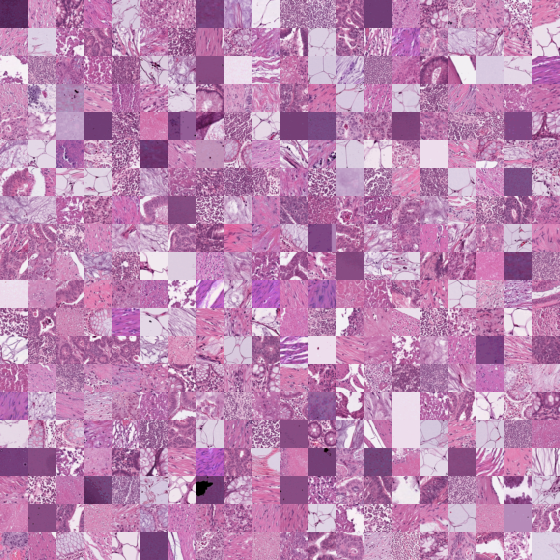

In [6]:
# Show sample images in this cell
print('Sample training images')
train_dataset.montage()


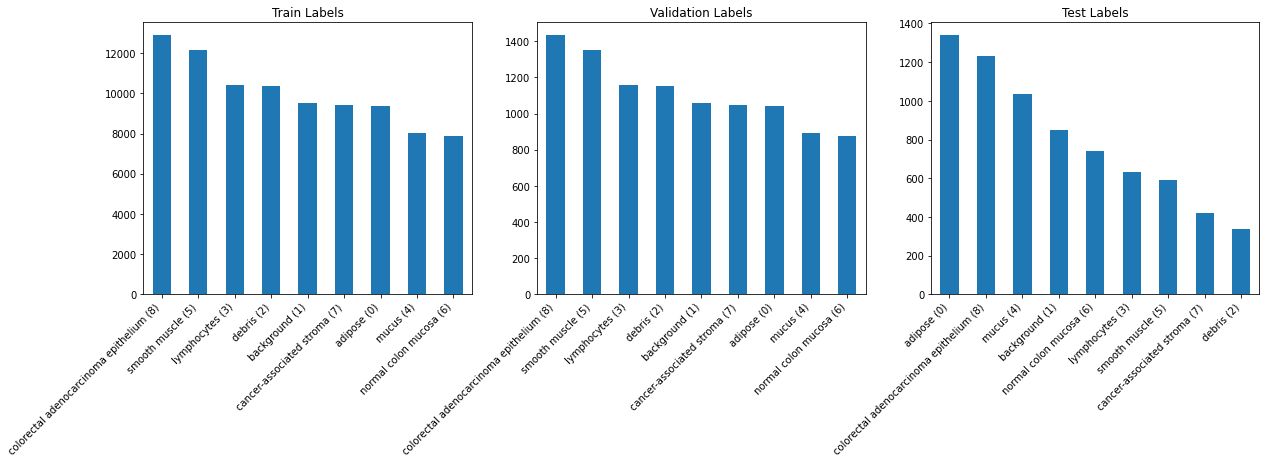

In [7]:
# Show class distribution of labels
import matplotlib.pyplot as plt

# get the labels
train_labels = train_dataset.labels
val_labels = val_dataset.labels
test_labels = test_dataset.labels

# Map label indices to descriptive names
label_names = info["label"]

# create a dataframe with the labels
train_labels_df = pd.DataFrame(train_labels, columns=["label"])
train_labels_df["label_name"] = train_labels_df["label"].map(label_names)
val_labels_df = pd.DataFrame(val_labels, columns=["label"])
val_labels_df["label_name"] = val_labels_df["label"].map(label_names)
test_labels_df = pd.DataFrame(test_labels, columns=["label"])
test_labels_df["label_name"] = test_labels_df["label"].map(label_names)

# plot the class distribution
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
train_labels_df["label"].value_counts().plot(kind="bar", ax=ax[0], title="Train Labels")
val_labels_df["label"].value_counts().plot(
    kind="bar", ax=ax[1], title="Validation Labels"
)
test_labels_df["label"].value_counts().plot(kind="bar", ax=ax[2], title="Test Labels")

for i in range(3):
    # Append x-axis labels with descriptions
    ax[i].set_xticklabels(
        [
            f"{label_names[t.get_text()]} ({t.get_text()})"
            for t in ax[i].get_xticklabels()
        ]
    )

    # Slighly rotate x-axis labels for better readability
    plt.setp(ax[i].get_xticklabels(), rotation=45, ha="right")


plt.show()

---

In [ ]:
# import os


# # datasets_path = '/content/drive/My Drive/Shared with me/598-58/datasets'


# # Or, if you are the owner (brianib2) and shared it with others:
# datasets_path = '/content/drive/My Drive/598-58/datasets/brain-tumor-dataset'


# import os
# import numpy as np
# import scipy.io
# import matplotlib.pyplot as plt

# base_path = datasets_path

# # Function to load .mat files and extract data
# def load_data(folder):
#     files = os.listdir(folder)
#     data_list = []
#     for file in files:
#         mat = scipy.io.loadmat(os.path.join(folder, file))
#         data = mat['cjdata']
#         data_list.append(data)
#     return data_list

# # Load data from each subset
# data_parts = ['brainTumorDataPublic_1766', 'brainTumorDataPublic_7671532',
#               'brainTumorDataPublic_15332298', 'brainTumorDataPublic_22993064']
# all_data = []
# for part in data_parts:
#     part_data = load_data(os.path.join(base_path, part))
#     all_data.extend(part_data)


### Model

The model includes the model definitation which usually is a class, model training, and other necessary parts.

- Model architecture: layer number/size/type, activation function, etc
- The "CFG" class in the code below references both a CNN (ResNet) and a Transformer Model (Vision Transformer (ViT) ), characteristic of the CASS Model
- Training objectives: loss function, optimizer, weight of each loss term, etc
Others: whether the model is pretrained, Monte Carlo simulation for uncertainty analysis, etc
- The code of model should have classes of the model, functions of model training, model validation, etc.
- If your model training is done outside of this notebook, please upload the trained model here and develop a function to load and test it.

- NOTE: The citation to the original paper and the original paper's git repo is in the References section below!

In [8]:
# Define a the number to string maps for labels and the device

label_num2str = {
    0: "adipose",
    1: "background",
    2: "debris",
    3: "lymphocytes",
    4: "mucus",
    5: "smooth muscle",
    6: "normal colon mucosa",
    7: "cancer-associated stroma",
    8: "colorectal adenocarcinoma epithelium",
}

print(f"label_num2str: {label_num2str}")

label_str2num = {}
for i in label_num2str:
    label_str2num[label_num2str[i]] = i

print(f"label_str2num: {label_str2num}")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print("device:", device)

label_num2str: {0: 'adipose', 1: 'background', 2: 'debris', 3: 'lymphocytes', 4: 'mucus', 5: 'smooth muscle', 6: 'normal colon mucosa', 7: 'cancer-associated stroma', 8: 'colorectal adenocarcinoma epithelium'}
label_str2num: {'adipose': 0, 'background': 1, 'debris': 2, 'lymphocytes': 3, 'mucus': 4, 'smooth muscle': 5, 'normal colon mucosa': 6, 'cancer-associated stroma': 7, 'colorectal adenocarcinoma epithelium': 8}
device: cpu


In [9]:
class CFG:
    # We dont need to give the path to CSV and images as medMNIST provides dataloaders out of hte box.
    # Check MNIST Get-started-DEDL.ipynb for details on how to get the label to num, num to label and
    # class weights for the MedMNIST dataset.
    label_num2str = label_num2str
    label_str2num = label_str2num
    fl_alpha = 1.0  # alpha of focal_loss
    fl_gamma = 2.0  # gamma of focal_loss
    cls_weight = [
        0.4368473694738948,
        0.4597319463892779,
        0.5959191838367675,
        0.6024804960992198,
        0.21920384076815363,
        0.8874974994999001,
        0.2,
        0.4424484896979396,
        1.0,
    ]
    cnn_name = "resnet50"
    vit_name = "vit_base_patch16_384"
    seed = 77
    num_classes = 9
    batch_size = 16
    t_max = 16
    lr = 1e-3
    min_lr = 1e-6
    n_fold = 6
    num_workers = 8
    gpu_idx = 0
    device = torch.device(f"cuda:{gpu_idx}" if torch.cuda.is_available() else "cpu")
    gpu_list = [gpu_idx]

#### Focal Loss
Focal Loss was chosen by the authors as the loss function because is necessary for addressing class imbalances typically inherent in medical datasets.

See: https://medium.com/swlh/focal-loss-an-efficient-way-of-handling-class-imbalance-4855ae1db4cb


In [10]:
"""
Define Focal-Loss

cls_weights Configuration: Adjust the CFG.cls_weight array to match the frequency of each tumor type in your dataset.
This should reflect the inverse frequency of each class or other heuristics that you find suitable for balancing the class influence in loss calculation.
"""


class FocalLoss(nn.Module):
    """
    The focal loss for fighting against class-imbalance
    """

    def __init__(self, alpha=1, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = 1e-12  # prevent training from Nan-loss error
        self.cls_weights = torch.tensor(
            [CFG.cls_weight], dtype=torch.float, requires_grad=False, device=CFG.device
        )

    def forward(self, logits, target):
        """
        logits & target should be tensors with shape [batch_size, num_classes]
        """
        probs = torch.sigmoid(logits)
        one_subtract_probs = 1.0 - probs
        # add epsilon
        probs_new = probs + self.epsilon
        one_subtract_probs_new = one_subtract_probs + self.epsilon
        # calculate focal loss
        log_pt = target * torch.log(probs_new) + (1.0 - target) * torch.log(
            one_subtract_probs_new
        )
        pt = torch.exp(log_pt)
        focal_loss = -1.0 * (self.alpha * (1 - pt) ** self.gamma) * log_pt
        focal_loss = focal_loss * self.cls_weights
        return torch.mean(focal_loss)

In [11]:
"""
Define F1 score metric
"""


class MyF1Score(Metric):
    def __init__(self, cfg, threshold: float = 0.5, dist_sync_on_step=False):
        super().__init__(dist_sync_on_step=dist_sync_on_step)
        self.cfg = cfg
        self.threshold = threshold
        self.add_state("tp", default=torch.tensor(0), dist_reduce_fx="sum")
        self.add_state("fp", default=torch.tensor(0), dist_reduce_fx="sum")
        self.add_state("fn", default=torch.tensor(0), dist_reduce_fx="sum")

    def update(self, preds: torch.Tensor, target: torch.Tensor):
        # assert preds.shape == target.shape
        preds_str_batch = self.num_to_str(torch.sigmoid(preds))
        target_str_batch = self.num_to_str(target)
        tp, fp, fn = 0, 0, 0
        for pred_str_list, target_str_list in zip(preds_str_batch, target_str_batch):
            for pred_str in pred_str_list:
                if pred_str in target_str_list:
                    tp += 1
                if pred_str not in target_str_list:
                    fp += 1

            for target_str in target_str_list:
                if target_str not in pred_str_list:
                    fn += 1
        self.tp += tp
        self.fp += fp
        self.fn += fn

    def compute(self):
        # To switch between F1 score and recall.
        f1 = 2.0 * self.tp / (2.0 * self.tp + self.fn + self.fp)
        rec = self.tp / (self.tp + self.fn)
        return f1

    def num_to_str(self, ts: torch.Tensor) -> list:
        batch_bool_list = (ts > self.threshold).detach().cpu().numpy().tolist()
        batch_str_list = []
        for one_sample_bool in batch_bool_list:
            # print(self.cfg.label_num2str)
            lb_str_list = [
                self.cfg.label_num2str[lb_idx]
                for lb_idx, bool_val in enumerate(one_sample_bool)
                if bool_val
            ]
            batch_str_list.append(lb_str_list)
        return batch_str_list

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

cfg=CFG()
model_cnn = timm.create_model(cfg.cnn_name, pretrained=True)
model_vit = timm.create_model(cfg.vit_name, pretrained=True)
model_cnn.to(device)
model_vit.to(device)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop2): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1):

In [14]:
import torch
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import torch
import torch.cuda as cuda


def ssl_train_model(
    train_loader,
    model_vit,
    optimizer_vit,
    scheduler_vit,
    model_cnn,
    optimizer_cnn,
    scheduler_cnn,
    num_epochs,
):
    writer = SummaryWriter()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    phase = "train"
    model_cnn.train()
    model_vit.train()

    # print(cuda.memory_summary(device=device, abbreviated=False))

    for i in tqdm(range(num_epochs)):
        with torch.set_grad_enabled(phase == "train"):
            for img, _ in tqdm(train_loader):
                img = img.to(device)

                # use for debugging
                # print(f"Start of loop - {cuda.memory_summary(device=device, abbreviated=True)}")
                pred_vit = model_vit(img)
                pred_cnn = model_cnn(img)

                model_sim_loss = loss_fn(pred_vit, pred_cnn)
                loss = model_sim_loss.mean()

                loss.backward()

                optimizer_cnn.step()
                optimizer_vit.step()
                scheduler_cnn.step()
                scheduler_vit.step()

                print("For -", i, "Loss:", loss.item())
                writer.add_scalar("Self-Supervised Loss/train", loss.item(), i)

                del img, pred_vit, pred_cnn, model_sim_loss, loss

    writer.flush()


def loss_fn(x, y):
    x = torch.nn.functional.normalize(x, dim=-1, p=2)
    y = torch.nn.functional.normalize(y, dim=-1, p=2)
    return 2 - 2 * (x * y).sum(dim=-1)

In [15]:
optimizer_cnn = SWA(torch.optim.Adam(model_cnn.parameters(), lr=1e-3))
optimizer_vit = SWA(torch.optim.Adam(model_vit.parameters(), lr=1e-3))
scheduler_cnn = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer_cnn, T_max=16, eta_min=1e-6
)
scheduler_vit = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer_vit, T_max=16, eta_min=1e-6
)

fl_alpha = 1.0  # alpha of focal_loss
fl_gamma = 2.0  # gamma of focal_loss
cls_weight = [0.9475164011246484, 0.4934395501405811, 0.5029053420805999, 0.2, 1.0]

# these are unused (brian 4/11)
# criterion_vit = FocalLoss(fl_alpha, fl_gamma)
# criterion_cnn = FocalLoss(fl_alpha, fl_gamma)

### Training


#### Computational Requirements
* We are able to get through a clean run of self supervised training using the V100 GPU on the Google Colab Notebook (this required a paid Colab Pro account).

However, both the CNN and Transformer portions of CASS came with additional unforeseen issues which forced us to invent workarounds and other modifications detailed below.


- We are also able to run through the supervised CNN training although this part of the code still needs modifications to work as expected.

- Finally, when training the ViT model we run into a CUDA memory error. It is worth noting that **significant** adjustments had to be made to even get to this point where we could successfully complete self supervised training.
  - We sampled a subset of the medMNIST dataset, only trained for 1 epoch, and lowered batch size to 8.

In comparison, the CASS authors used a batch size of 16 and 100 epochs during self-supervised learning.



| Requirement             | Description                                                 |
|------------------------|-------------------------------------------------------------|
| Hardware               | NVIDA V100 GPU (Google Colab)       |
|                        
| Average Runtime per Epoch | - Average runtime for each epoch (e.g., in minutes)        |
| Total Trials           | - Total number of trials (e.g., hyperparameter tuning)      |
| GPU Hours Used         | See Comment |
| Training Epochs        | - Total number of training epochs                            |
| Other Requirements     | See `Data` and `Model` sections of this notebook for library and parameter requirements. |


Below, we perform both self=supervised training (CASS) and supervised training via CNN and ViT


In [19]:
# Train using self-supervised learning
import os

print(f'Number of training samples: {len(train_loader)}')

# Check if checkpoints exist
# These are the location of the paths from the shared drive
checkpoints_directory = "/content/drive/MyDrive/598-58/checkpoints"

# Try to load the models from the checkpoints
try:
    checkpoint_files = os.listdir(checkpoints_directory)
except FileNotFoundError:
    print("Checkpoints directory not found")
    checkpoint_files = []

print(f'checkpoint files: {checkpoint_files}')

failed_to_load = False
if "cass-r50-med-mnist-pathmnist.pt" in checkpoint_files:
    print("Loading ResNet50 model")
    model_cnn = torch.load(f'{checkpoints_directory}/cass-r50-med-mnist-pathmnist.pt')
else:
    failed_to_load = True

if "cass-vit-med-mnist-pathmnist.pt" in checkpoint_files:
    print("Loading ViT model")
    model_vit = torch.load(f'{checkpoints_directory}/cass-vit-med-mnist-pathmnist.pt')
else:
    failed_to_load = True

if failed_to_load:
    print('Running self-')
    ssl_train_model(
        train_loader,
        model_vit,
        optimizer_vit,
        scheduler_vit,
        model_cnn,
        optimizer_cnn,
        scheduler_cnn,
        num_epochs=1,
    )

    # Saving SSL Models
    print("Saving Cov-T")

    torch.save(model_cnn, "./cass-r50-med-mnist-pathmnist.pt")
    torch.save(model_vit, "./cass-vit-med-mnist-pathmnist.pt")

Number of training samples: 113
Checkpoints directory not found
checkpoint files: []
Running self-


  0%|          | 0/1 [00:00<?, ?it/s]

For - 0 Loss: 1.9602868556976318


For - 0 Loss: 1.688490629196167


For - 0 Loss: 0.21940945088863373


For - 0 Loss: 0.1299503892660141


For - 0 Loss: 0.10263527929782867


For - 0 Loss: 0.06925882399082184


For - 0 Loss: 0.044115662574768066


For - 0 Loss: 0.030362457036972046


For - 0 Loss: 0.035740047693252563


For - 0 Loss: 0.03343191742897034


  0%|          | 0/1 [04:01<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# Train using supervised learning (need labels)

import math
from tqdm import tqdm

# TODO Commented out line below because indenting was off for a for loop and did not see it used at all
# for fold_idx, (train_indices, valid_indices) in enumerate(k_fold.split(all_img_names)):
model_vit = torch.load("./cass-vit-med-mnist-pathmnist.pt")
model_cnn = torch.load("./cass-r50-med-mnist-pathmnist.pt")
last_loss = math.inf
val_loss_arr = []
train_loss_arr = []
counter = 0

model_cnn.to(device)
model_vit.to(device)
print("*" * 10)


# Train Correspong Supervised CNN
print("Fine tunning Cov-T")
writer = SummaryWriter()
model_cnn.fc = nn.Linear(in_features=2048, out_features=9, bias=True)
criterion = FocalLoss(cfg.fl_alpha, cfg.fl_gamma)
metric = MyF1Score(cfg)
val_metric = MyF1Score(cfg)
optimizer = torch.optim.Adam(model_cnn.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer, T_max=cfg.t_max, eta_min=cfg.min_lr
)
model_cnn.train()
from torch.autograd import Variable

best = 0
best_val = 0
for epoch in tqdm(range(1)):
    total_loss = 0
    for images, label in tqdm(train_loader):
        model_cnn.train()
        images = images.to(device)
        label = label.to(device)
        model_cnn.to(device)
        pred_ts = model_cnn(images)
        loss = criterion(pred_ts, label)
        score = metric(pred_ts, label)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        scheduler.step()
        total_loss += loss.detach()
    avg_loss = total_loss / len(train_loader)
    train_score = metric.compute()
    logs = {
        "train_loss": avg_loss,
        "train_f1": train_score,
        "lr": optimizer.param_groups[0]["lr"],
    }
    writer.add_scalar("CNN Supervised Loss/train", loss, epoch)
    writer.add_scalar("CNN Supervised F1/train", train_score, epoch)
    print(logs)

    if best < train_score:
        best = train_score
        model_cnn.eval()
        total_loss = 0
        with torch.no_grad():
            for images, label in valid_loader:
                images = images.to(device)
                label = label.to(device)
                model_cnn.to(device)
                pred_ts = model_cnn(images)
                score_val = val_metric(pred_ts, label)
                val_loss = criterion(pred_ts, label)
                total_loss += val_loss.detach()
        avg_loss = total_loss / len(train_loader)
        print("Val Loss:", avg_loss)
        val_score = val_metric.compute()
        print("CNN Validation Score:", val_score)
        writer.add_scalar("CNN Supervised F1/Validation", val_score, epoch)
        if avg_loss > last_loss:
            counter += 1
        else:
            counter = 0

        last_loss = avg_loss
        if counter > 5:
            print("Early Stopping!")
            break
        else:
            if val_score > best_val:
                best_val = val_score
                print("Saving")
                torch.save(model_cnn, "./cass-r50-med-mnist-pathmnist-label.pt")
writer.flush()
last_loss = 999999999
val_loss_arr = []
train_loss_arr = []
counter = 0


# Training the Corresponding ViT
model_vit.head = nn.Linear(in_features=768, out_features=9, bias=True)
criterion = FocalLoss(cfg.fl_alpha, cfg.fl_gamma)
metric = MyF1Score(cfg)
optimizer = torch.optim.Adam(model_vit.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer, T_max=cfg.t_max, eta_min=cfg.min_lr
)
model_vit.train()
val_metric = MyF1Score(cfg)
writer = SummaryWriter()

from torch.autograd import Variable

best = 0
best_val = 0
for epoch in tqdm(range(1)):
    total_loss = 0
    for images, label in tqdm(train_loader):
        model_vit.train()
        images = images.to(device)
        label = label.to(device)
        model_vit.to(device)
        pred_ts = model_vit(images)
        loss = criterion(pred_ts, label)
        score = metric(pred_ts, label)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        scheduler.step()
        total_loss += loss.detach()
    avg_loss = total_loss / len(train_loader)
    train_score = metric.compute()
    logs = {
        "train_loss": loss,
        "train_f1": train_score,
        "lr": optimizer.param_groups[0]["lr"],
    }
    writer.add_scalar("ViT Supervised Loss/train", loss, epoch)
    writer.add_scalar("ViT Supervised F1/train", train_score, epoch)
    print(logs)
    if best < train_score:
        best = train_score
        model_vit.eval()
        total_loss = 0
        with torch.no_grad():
            for images, label in valid_loader:
                images = images.to(device)
                label = label.to(device)
                model_vit.to(device)
                pred_ts = model_vit(images)
                score_val = val_metric(pred_ts, label)
                val_loss = criterion(pred_ts, label)
                total_loss += val_loss.detach()
        avg_loss = total_loss / len(train_loader)
        val_score = val_metric.compute()
        print("ViT Validation Score:", val_score)
        print("Val Loss:", avg_loss)
        writer.add_scalar("ViT Supervised F1/Validation", val_score, epoch)
        if avg_loss > last_loss:
            counter += 1
        else:
            counter = 0

        last_loss = avg_loss
        if counter > 5:
            print("Early Stopping!")
            break
        else:
            if val_score > best_val:
                best_val = val_score
                print("Saving")
                torch.save(model_vit, "./cass-vit-med-mnist-pathmnist.pt")

    writer.flush()
    print("*" * 10)

### Evaluation

We are still working out the final stages of our training section, specifically the supervised learning that follows the initial self-supervised representation learning via CASS. Therefore, we are lacking in metrics right now. However, you can see above in the self-supervised training output that we progressively get lower and lower loss values as we step through the self supervised learning process for our training dataset. We will continue working to get a model trained so that we can run evaluations and present some data to discuss.

In [ ]:
class my_model():
  # use this class to define your model
  pass

model = my_model()
loss_func = None
optimizer = None

def train_model_one_iter(model, loss_func, optimizer):
  pass

num_epoch = 10
# model training loop: it is better to print the training/validation losses during the training
for i in range(num_epoch):
  train_model_one_iter(model, loss_func, optimizer)
  train_loss, valid_loss = None, None
  print("Train Loss: %.2f, Validation Loss: %.2f" % (train_loss, valid_loss))


# Results

This section will contain statistical results from running CASS using the MedMNIST dataset.

* Because the Brain Tumor dataset was previously the only dataset the authors used which we could find, and because this dataset ultimately proved to somehow not be the same data that the authors describe, we were not able to implement CASS-trained CNN and Transformers using this dataset and there are no results to present for this dataset.
* Results (medMNIST): For the medMNIST dataset, we were able to successfully reproduce CASS for representational learning. There were many difficulties along the way, mainly due to computational requirements for the model training and limitations in computing resources. The GitHub repo for the paper was also not perfect and we had to make many adjustments to get the code to compile and run with successful results. We are not able to overcome these obstacles yet for the supervised learning component.
*Analysis (medMNIST): The output throughout the notebook above shows evidence of EDA, model definitions, and training results. As mentioned above in evaluation, the loss values for CASS in the training output show successful completion for one epoch. The self-supervised portion of this is still in work as we ran into computational hurdles and complications in reproducing the models.
*Plans (medMNIST): Our plans for the next phase begin with completion of supervised learning. We will then consider our ablation studies. In doing both of these we will have to work through the computational limitations presented. We may also look to get the implementation working with a second dataset (Brain Tumor), which has EDA shown above.

In [ ]:
# metrics to evaluate my model

# plot figures to better show the results

# it is better to save the numbers and figures for your presentation.

| Metric       | Your Model | Author's Model | Dataset Sample Size |
|--------------|------------|----------------|---------------------|
| Accuracy     | XX.X%      | XX.X%          | N                   |
| AUC          | X.XX       | X.XX           | N                   |
| RMSE         | X.XX       | X.XX           | N                   |
| Precision    | XX.X%      | XX.X%          | N                   |
| Recall       | XX.X%      | XX.X%          | N                   |
| F1 Score     | X.XX       | X.XX           | N                   |
| Sensitivity  | XX.X%      | XX.X%          | N                   |
| Specificity  | XX.X%      | XX.X%          | N                   |

**Notes:**
- `N` is the total number of samples in the dataset used for testing.
- `XX.X%` and `X.XX` represent placeholder values for the actual percentages and scores respectively.



### Findings (vs. Authors' Original Paper)

In [ ]:
# compare you model with others
# you don't need to re-run all other experiments, instead, you can directly refer the metrics/numbers in the paper

### Model comparison

### Ablation Study

As stated in our **Scope of Reproducibility** section, our second hypothesis was that reducing the number of pre-training epochs and batch sizes for the CASS model will still allow for strong model performance in comparison with existing methods.

However, given our significant difficulties in attempting to reproduce the authors findings due to:
- Lack of access to their original datasets
- Lack of documentation and "out of the box" functionality in authors' starter code
- Lack of access to equivalent computing resources

We were unable to test this hypothesis, and as such the ablation study remains to be performed. We hope that other teams and groups may succeed in testing this hypothesis and sharing their findings.

To some extent, by needing to adjust parameters such as training epochs and batch sizes in order to train the model, we performed an ablation study of sorts. However, we acknowledge that the intention of the study is to expound upon the original paper's findings and explore variations in implementation or usage.

# Discussion

Generally, Team 58 found recreating the CASS experiments from the research paper to be extremely difficult for a multitude of reasons which we will explain in this section. As such, we were not able to replicate the study, much less experiment with our proposed ablations.


In this section,you should discuss your work and make future plan. The discussion should address the following questions:
  * Make assessment that the paper is reproducible or not.
  * Explain why it is not reproducible if your results are kind negative.
  * Describe “What was easy” and “What was difficult” during the reproduction.
  * Make suggestions to the author or other reproducers on how to improve the reproducibility.
  * What will you do in next phase.



Our results demonstrate that the paper is/is not reproducible. This conclusion is based on the following key observations:
1. This is a key observation
2. This is a key observation
3. This is a key observation

It is important to note here that here is a bunch of filler text to swap out with unique relevancy of observations. It is reproducible in that here are the ways we demonstrated its' reproducibility, however here are some other reasons why some unexpected things happened which we could not have anticipated. In the future, we would do some of these other things differently given appropriate resources in terms of time/money/knowledge/people.

The easiest part of reproducing this paper was this things right here and some other stuff there. This was or was not easy based on our initial assessment of the required tasks.

The most difficult part was this thing here. We did or did not anticipate the difficulty of this, and would advise other groups in the future to consider this carefully. Here's how it might be mitigated.


#### Data Availability (or lack thereof)

As described in our `Methodology` and `Data` sections, of the datasets referenced by the authors, only one (Brain Tumor dataset) was publicly available.

Given that, upon exploratory data analysis (EDA) we discovered that the dataset did not contain the same number of total records as the one the researchers used, and further given that this dataset included an even further skewed class imbalance (closer to 90/10 than the 80/20 described by the CASS authors), we determined that we could not faithfully recreate the research experiments using this dataset.

This left us to use the MedMNIST dataset which was not described in the paper, but was referenced in the authors' Github starter code and which we proposed might be suitable for our hypothesis.

#### Starter Code from Researchers

We found the code available to use to be poorly documented. There were two different CASS.ipynb notebooks to use, and the "Getting Started" notebook provided insufficient details for getting CASS up and running using the authors' own code and provided dataset (MedMNIST), let alone tailoring this implementation to other datasets.

In the case of both the MedMNIST and brain tumor datasets, we found ourselves spending in excess of 50 hours attempting to troubleshoot bugs in the given code, or attempting to understand the authors' particular approach to implementing a CNN and Transformer trained with CASS. Factoring into all of this that the brain tumor dataset is in greyscale while the MedMNIST is in color, we found ourselves consumed by "learning on the fly" and attempting to troubleshoot errors rather than recreating a study.

#### Computing Limitations

One of the benefits of CASS espoused by the authors in their paper is the ability to overcome a lack of computing resources. However, we found this "advantage" to be ironic in that all three of our team members resorted to cloning our test notebook to personal Google accounts and upgrading to paid Google Collab subscriptions in order to buy higher-capacity computing resources than those offered for free with our educational accounts.

The authors utilized an NVIDIA RTX8000 graphical processing unit (GPU) with 48 GB video RAM, 2 PU cores, and 64 GB system RAM.

Team 58 utilized at any given time [10]:
- NVIDIA Tesla T4 GPU with 16 GB RAM, unknown CPU (system) RAM
- NVIDA T100 GPU with 16GB RAM, unknown CPU (system) RAM
- NVIDIA A100 GPU with 80GB RAM, unknown CPU (system) RAM
- Mac M1 Silicon CPU

We frequently found ourselves hitting consumption limits on the Tesla T4 GPU that would boot us from the notebook for the remainder of the day. Paid GPU instances still required us to limit batch sizes in order for the models to run through a single epoch without freezing or crashing.

That we paid a combined amount of at least $30 USD and still were unable to faithfully recreate the authors' work stands as a testament to the difficulty in reproducing this paper.

#### Suggestions for other teams

We recommend evaluating your computing resources ahead of time in order to be prepared for the challenges in training the self-supervised and supervised models. We also recommend becoming as familiar with the model as possible before starting to reproduce, because the existing code has many flaws and requires modifications to get working.

#### Suggestions for authors

We recommend revising the code base in GitHub as there were many issues to resolve, from basics like installs and imports to the model and training code itself. We also recommend providing more detailed info on accessing and preprocessing the datasets mentioned in the paper as we ended up using medMNIST which was only mentioned in the git repo.

# Public GitHub Repo
Please see introduction section above for link to team GitHub repo.

# References

1. Singh, P. & Cirrone, J. (2023). Efficient Representation Learning for Healthcare with Cross-Architectural Self-Supervision. Proceedings of the 8th Machine Learning for Healthcare Conference, in Proceedings of Machine Learning Research, 219, 691-711. Available from https://proceedings.mlr.press/v219/singh23a.html.

2. Singh, P. (2022). Official PyTorch implementation of CASS. [Software]. Retrieved from https://github.com/pranavsinghps1/CASS.

3. Cheng, J. (2017, April 2). Brain tumor dataset. figshare. Retrieved from https://figshare.com/articles/dataset/brain_tumor_dataset/1512427.

4. Tschandl P., Rosendahl C., & Kittler H. (2018). The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. Sci. Data, 5, 180161. https://doi.org/10.1038/sdata.2018.161.

5. Codella, N. C. F., Gutman, D., Celebi, M. E., Helba, B., Marchetti, M. A., Dusza, S. W., Kalloo, A., Liopyris, K., Mishra, N., Kittler, H., & Halpern, A. (2017). Skin Lesion Analysis Toward Melanoma Detection: A Challenge at the 2017 International Symposium on Biomedical Imaging (ISBI), Hosted by the International Skin Imaging Collaboration (ISIC). arXiv:1710.05006. Retrieved from https://arxiv.org/abs/1710.05006.

6. Combalia, M., Codella, N. C. F., Rotemberg, V., Helba, B., Vilaplana, V., Reiter, O., Halpern, A. C., Puig, S., & Malvehy, J. (2019). BCN20000: Dermoscopic Lesions in the Wild. arXiv:1908.02288. Retrieved from https://arxiv.org/abs/1908.02288.

7. Yang, J., Shi, R., Wei, D., Liu, Z., Zhao, L., Ke, B., Pfister, H., & Ni, B. (2023). MedMNIST v2-A large-scale lightweight benchmark for 2D and 3D biomedical image classification. Scientific Data.

8. Yang, J., Shi, R., & Ni, B. (2021). MedMNIST Classification Decathlon: A Lightweight AutoML Benchmark for Medical Image Analysis. IEEE 18th International Symposium on Biomedical Imaging (ISBI).

9. Bhuvaji, S. (2020). Brain Tumor Classification Using Deep Learning Algorithms. Retrieved from https://github.com/SartajBhuvaji/Brain-Tumor-Classification-Using-Deep-Learning-Algorithms.

10. Google. (2024). Google Cloud Compute Specifications. Retrieved from https://cloud.google.com/compute/docs/gpus.
